# Life Expectancy By Country

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country's economic success might impact the life expectancy in that area.

## 1. Access the Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("country_data.csv")
data.head()

# 2. Data Preprocessing

In [22]:
#Checking the data types of the columns
data.dtypes

Country             object
Life Expectancy    float64
GDP                float64
dtype: object

The dataset is correctly loaded: countries are stored as text, and both life expectancy and GDP are numeric variables suitable for statistical analysis.

In [23]:
#Checking the shape of the dataset
data.shape

(158, 3)

### 2.1 Descriptive Statistics

In [25]:
data.describe()

,Life Expectancy,GDP
count,158.000000,158.000000
mean,69.248510,7389.061606
std,9.350804,10808.691315
min,46.112500,137.815321
25%,62.325000,804.387248
50%,72.525000,2938.078115
75%,75.442187,7862.245114
max,82.537500,57362.874600


In [26]:
data.head()

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


# 3. Exploratory Data Analysis

### 3.1 Column Selection

In [28]:
life_expectancy = data["Life Expectancy"]

### 3.2 Find the Quantiles

In [29]:
# Calculate quartiles
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])

# Print results
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


Based on the quartiles, I expect the distribution to be centered around 70–75 years, with many countries close together in that range and a left tail representing countries with low life expectancy.

### 3.3 plot histogram


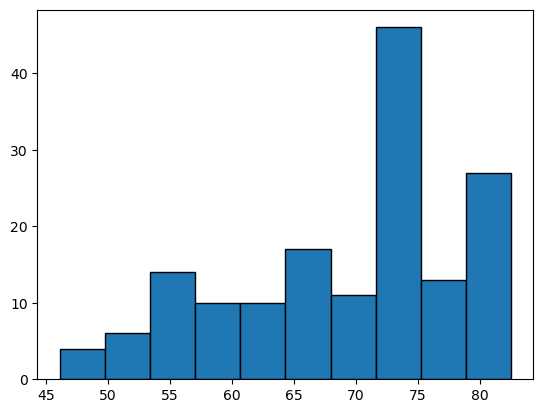

In [32]:
plt.hist(life_expectancy, edgecolor='black')
plt.show()

A life expectancy of 70 years falls in the second quarter of the data, between the first quartile and the median.



## 4. Splitting the Data by GDP

In [44]:
gdp = gdp = data["GDP"]

median_gdp = np.quantile(gdp, 0.5)
print(median_gdp)

2938.0781155


### 4.1 Group Data Split

In [41]:
low_gdp = data[data['GDP'] <= median_gdp]
high_gdp = data[data["GDP"] >= median_gdp]

### 4.2 Group Comparison Stats

In [42]:
low_gdp_quartiles = np.quantile(low_gdp["Life Expectancy"], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)

[56.3375  64.34375 71.7375 ]


In [43]:
high_gdp_quartiles = np.quantile(high_gdp["Life Expectancy"], [0.25, 0.5, 0.75])
print(high_gdp_quartiles)

[72.965625 75.15625  80.521875]


## 5. Histogram and Conclusions

### 5.1 Compare distributions visually

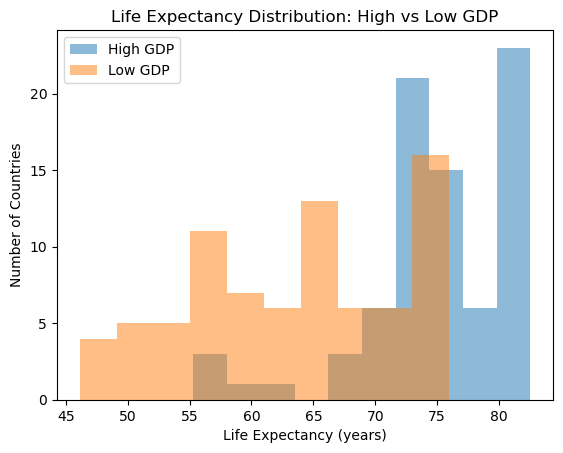

In [46]:
plt.hist(high_gdp["Life Expectancy"], alpha=0.5, label="High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha=0.5, label="Low GDP")

plt.xlabel("Life Expectancy (years)")
plt.ylabel("Number of Countries")
plt.title("Life Expectancy Distribution: High vs Low GDP")
plt.legend()

plt.show()

A country with a life expectancy of 70 years falls in the first quarter among high-GDP countries, but in the fourth quarter among low-GDP countries.

# 6. Conclusion

Countries with higher GDP tend to have significantly higher life expectancy. When comparing quartiles and histograms, high-GDP countries cluster tightly around 75–82 years, while low-GDP countries show much lower and more spread-out values. A life expectancy of 70 years is considered low for a high-GDP country (first quartile), but high for a low-GDP country (fourth quartile). This suggests that economic conditions strongly influence national health outcomes.

### 6.1 Interpreting a Life Expectancy of 70 Years

We now revisit the question:
If a country has a life expectancy of 70 years, where does it fall in each group?
Based on the quartiles:
For all countries combined, 70 years is in the second quartile (between Q1 and the median).

For high-GDP countries, 70 years tends to be below Q1.
→ It falls in the first quarter of the high-GDP distribution.
→ 70 years is low for a rich country.

For low-GDP countries, 70 years tends to be around or above Q3.
→ It falls in the fourth quarter of the low-GDP distribution.
→ 70 years is high for a poorer country.

Same number, different story depending on GDP.

### 6.2 Overall Conclusion

Life expectancy is strongly related to GDP.
High-GDP countries generally have higher and less variable life expectancy.

A life expectancy of 70 years:
is below average in the group of wealthy countries, but above average in the group of poorer countries.
This shows that economic conditions matter: wealthier countries can more reliably provide healthcare, infrastructure, nutrition, and stability, which all contribute to people living longer.

In other words:
Richer countries live longer, and more consistently.
Poorer countries show lower and more uneven life expectancy.